# 필수과제1
- y값에 따른 타이타닉데이터들의 피처들의 관계를 정리해 주세요!
- 가설을 세우고, 여성이 생존율이 높을 것이다 이런 것들
- 피처들을 시각적으로도 확인하고, 기초통계적으로도 확인하여서 
- 실제로 내가 생각하는 생존과의 중요한 피처는 무엇인지를 정리해 주세요!
- 최소한 가설은 3개 이상으로 잡아서 진행해 주세요!
- 위에서 배운, groupby를 통한 생존에 대한 값 계산, 시각화까지 진행 

In [37]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
titanic=sns.load_dataset('titanic')

In [39]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 가설 1: 요금이 높을 수록 생존률도 높을 것이다

In [49]:
# fare 컬럼을 4개의 구간으로 나누기
titanic['Fare_Category'] = pd.qcut(titanic['fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [68]:
# 요금 카테고리별 생존률 계산
survive_by_fare=titanic.groupby('Fare_Category')['survived'].mean()

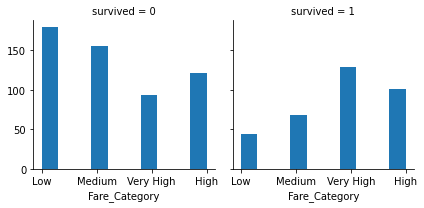

In [51]:
# 시각화
fare_survived=sns.FacetGrid(titanic,col='survived')
fare_survived.map(plt.hist,'Fare_Category')

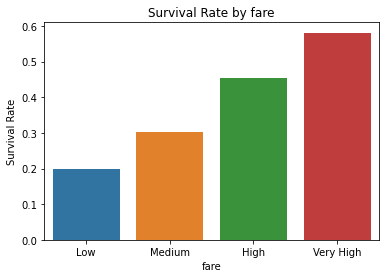

In [53]:
#시각화
sns.barplot(x=survive_by_fare.index, y=survive_by_fare.values)
plt.title('Survival Rate by fare')
plt.xlabel('fare')
plt.ylabel('Survival Rate')
plt.show()

# 가설 2: 성인 남성보다 그렇지 않은 탑승객의 생존률이 더 높을 것이다

In [66]:
survive_by_adult_male=titanic.groupby('adult_male')['survived'].mean()

In [67]:
survive_by_adult_male

adult_male
False    0.717514
True     0.163873
Name: survived, dtype: float64

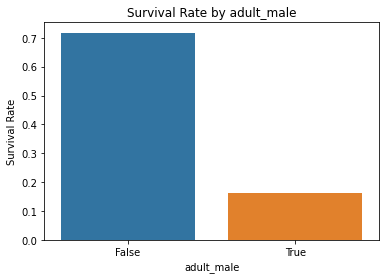

In [70]:
#시각화
sns.barplot(x=survive_by_adult_male.index, y=survive_by_adult_male.values)
plt.title('Survival Rate by adult_male')
plt.xlabel('adult_male')
plt.ylabel('Survival Rate')
plt.show()

# 가설 3:혼자 탑승한 사람보다 그렇지 않은 사람이 생존률이 더 높을 것이다

In [71]:
survive_by_alone=titanic.groupby('alone')['survived'].mean()

In [73]:
survive_by_alone

alone
False    0.505650
True     0.303538
Name: survived, dtype: float64

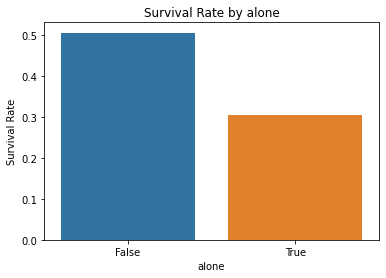

In [74]:
#시각화
sns.barplot(x=survive_by_alone.index, y=survive_by_alone.values)
plt.title('Survival Rate by alone')
plt.xlabel('alone')
plt.ylabel('Survival Rate')
plt.show()

# 가설 4:1등석,2등석,3등석 순서대로 생존률이 높을 것이다

In [75]:
survive_by_class=titanic.groupby('pclass')['survived'].mean()

In [76]:
survive_by_class

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

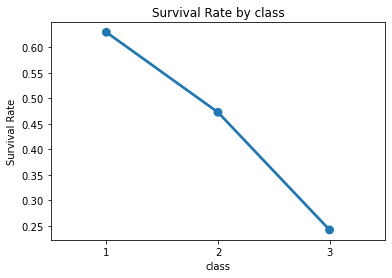

In [77]:
#시각화
sns.pointplot(x=survive_by_class.index, y=survive_by_class.values)
plt.title('Survival Rate by class')
plt.xlabel('class')
plt.ylabel('Survival Rate')
plt.show()

# 결론
- 탑승요금이 높을수록 생존률이 높다
- 좌석의 클래스에 따라 생존률에 차이가 있다(1등석이 3등석보다 생존률이 높다)
- 혼자 탑승한 승객보다 동반 탑승한 승객의 생존률이 더 높다
- 성인 남성의 생존률은 그렇지 않은 사람들보다 낮다